In [1]:
import numpy as np
import math

In [2]:
def binary(x,n):
    num = x
    bin_num = np.zeros(n)

    for i in range(n-1,-1,-1):
        if num - 2**i >= 0:
            bin_num[i] = int(1)
            num = num - 2**i

    return [int(x) for x in bin_num.tolist()]

def binary_inv(x,n):
    num = x
    bin_num = np.ones(n)

    for i in range(n-1,-1,-1):
        if num - 2**i >= 0:
            bin_num[i] = int(0)
            num = num - 2**i

    return [int(x) for x in bin_num.tolist()]

In [3]:
n=16
bipartitions = []
Ss = []

for i in range(2**(n-1)-1):
    bin_num = binary(i+1,n)
    bin_num_inv = binary_inv(i+1,n)
    S_1 = []
    S_2 = []
    for k in range(n):
        if bin_num[k] == 1:
            S_1.append(k+1)
        else:
            S_2.append(k+1)
    bipartitions.append([S_1, S_2])

    S1 = np.diag(bin_num)
    S2 = np.diag(bin_num_inv)
    
    Ss.append([S1,S2])


In [11]:
class nullifier():
    def __init__(self, unit_cell_modes, boundary_modes):
        self.unit_cell_modes = unit_cell_modes
        self.boundary_modes = boundary_modes

In [10]:
def mod2array(pos, neg):
    array = np.zeros(112)
    for num in pos:
        array[num-1] = 1
    for num in neg:
        array[num-1] = -1
    return array

In [ ]:
n_x_0 = nullifier(np.array([-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1]), np.zeros(112))

n_x_1 = nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,-1,1,0,0,-1,-1]), mod2array([91,94,101,102], [92,99,100,93]))
n_x_2 = nullifier(np.array([1,-1,0,0,-1,-1,0,0,-1,1,0,0,1,1,0,0]),mod2array([12,14],[11,13,19,20,21,22]))
n_x_3 = nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,-1,1]),mod2array([99,102,109,110],[75,76,77,78,100,101,107,108]))
n_x_4 = nullifier(np.array([-1,-1,0,0,0,0,0,0,1,1,0,0,0,0,0,0]),mod2array([4,6,35,38],[3,5,11,12,13,14,36,37]))
n_x_5 = nullifier(np.array([0,0,0,0,0,0,0,0,-1,1,1,-1,-1,-1,-1,-1]),mod2array([44,66,71,72],[43,47,48,65]))
n_x_6 = nullifier(np.array([-1,1,-1,1,-1,-1,1,1,0,0,0,0,0,0,0,0]),mod2array([42,65],[41,66,45,46,69,70]))
n_x_7 = nullifier(np.array([0,0,0,0,-1,1,1,-1,0,0,0,0,-1,1,-1,1]),mod2array([77,78],[51,52,53,54,75,76]))
n_x_8 = nullifier(np.array([-1,-1,-1,-1,0,0,0,0,-1,-1,1,1,0,0,0,0]),mod2array([36,38,59,62],[35,37,60,61]))
n_x_9 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,1,0,0,-1,-1]),mod2array([93,68,96,103,104],[94,101,102,67,95,71,72]))
n_x_10 = nullifier(np.array([0,0,0,0,0,0,0,0,1,-1,0,0,-1,-1,0,0]),mod2array([14,16,44,47,48],[13,21,22,15,43,23,24]))
n_x_11 = nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,0,0,0,0,0,0]),mod2array([64,89,92,99,100],[65,90,69,70,97,98,91]))
n_x_12 = nullifier(np.array([-1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0]),mod2array([10,41,12],[9,42,17,18,45,46,11,19,20]))
n_x_13 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]),mod2array([101,72,104,111,112],[102,77,78,109,110,71,103,79,80]))
n_x_14 = nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0]),mod2array([6,37,8,40,43,44],[5,38,13,14,7,39,15,16]))
n_x_15 = nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0]),mod2array([70,97,100,107,108],[69,98,73,74,105,106,99,75,76]))
n_x_16 = nullifier(np.array([1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([2,33,4,36],[1,34,9,10,41,42,3,35,11,12]))
n_x_17 = nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0]),mod2array([38,61,40,64,67,68],[37,62,39,63,43,44]))
n_x_18 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,-1]),mod2array([48,72,79,80],[53,54,77,78,47,71,55,56]))
n_x_19 = nullifier(np.array([-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([34,57,36,60],[33,58,41,42,65,66,35,59]))
n_x_20 = nullifier(np.array([0,0,0,0,-1,1,-1,1,0,0,0,0,0,0,0,0]),mod2array([46,69,75,76],[45,70,49,50,73,74,51,52]))
n_x_21 = nullifier(np.array([0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0]),mod2array([18,20,45,51,52],[17,19,25,26,27,28,46,49,50]))
n_x_22 = nullifier(np.array([0,0,0,0,1,-1,0,0,0,0,0,0,-1,1,0,0]),mod2array([20,22,53,54],[19,21,27,28,29,30,51,52]))
n_x_23 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0]),mod2array([22,24,48,55,56],[21,23,29,30,31,32,47,53,54]))
n_x_24 = nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([58,60,81,84,91,92],[57,59,65,66,82,83,89,90]))
n_x_25 = nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([60,62,83,86,93,94],[59,61,84,85,91,92]))
n_x_26 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([62,64,85,88,95,96],[61,63,67,68,86,87,93,94]))


n_p_0 = nullifier(np.array([-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,-1]), np.zeros(112))
n_p_1 = nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,1,-1,0,0,1,1]), mod2array([91,93], [92,94,99,100,101,102]))
n_p_2 = nullifier(np.array([1,-1,0,0,-1,-1,0,0,1,-1,0,0,-1,-1,0,0]),mod2array([12,13,21,22],[11,14,19,20]))
n_p_3 = nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,1,-1]),mod2array([77,78,99,101],[75,76,100,102,107,108,109,110]))
n_p_4 = nullifier(np.array([-1,-1,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0]),mod2array([4,5,13,14,35,37],[3,6,11,12,36,38]))
n_p_5 = nullifier(np.array([0,0,0,0,0,0,0,0,-1,1,1,-1,-1,-1,-1,-1]),mod2array([43,47,48,67],[44,68,71,72]))
n_p_6 = nullifier(np.array([1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0]),mod2array([42,65],[41,45,46,66,69,70]))
# n_p_7 = nullifier(np.array([0,0,0,0,-1,1,1,-1,0,0,0,0,-1,1,-1,1]),mod2array([77,78],[51,52,53,54,75,76]))
# n_p_8 = nullifier(np.array([-1,-1,-1,-1,0,0,0,0,-1,-1,1,1,0,0,0,0]),mod2array([36,38,59,62],[35,37,60,61]))
# n_p_9 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,1,0,0,-1,-1]),mod2array([93,68,96,103,104],[94,101,102,67,95,71,72]))
# n_p_10 = nullifier(np.array([0,0,0,0,0,0,0,0,1,-1,0,0,-1,-1,0,0]),mod2array([14,16,44,47,48],[13,21,22,15,43,23,24]))
# n_p_11 = nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,0,0,0,0,0,0]),mod2array([64,89,92,99,100],[65,90,69,70,97,98,91]))
# n_p_12 = nullifier(np.array([-1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0]),mod2array([10,41,12],[9,42,17,18,45,46,11,19,20]))
# n_p_13 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]),mod2array([101,72,104,111,112],[102,77,78,109,110,71,103,79,80]))
# n_p_14 = nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0]),mod2array([6,37,8,40,43,44],[5,38,13,14,7,39,15,16]))
# n_p_15 = nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0]),mod2array([70,97,100,107,108],[69,98,73,74,105,106,99,75,76]))
# n_p_16 = nullifier(np.array([1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([2,33,4,36],[1,34,9,10,41,42,3,35,11,12]))
# n_p_17 = nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0]),mod2array([38,61,40,64,67,68],[37,62,39,63,43,44]))
# n_p_18 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,-1]),mod2array([48,72,79,80],[53,54,77,78,47,71,55,56]))
# n_p_19 = nullifier(np.array([-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([34,57,36,60],[33,58,41,42,65,66,35,59]))
# n_p_20 = nullifier(np.array([0,0,0,0,-1,1,-1,1,0,0,0,0,0,0,0,0]),mod2array([46,69,75,76],[45,70,49,50,73,74,51,52]))
# n_p_21 = nullifier(np.array([0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0]),mod2array([18,20,45,51,52],[17,19,25,26,27,28,46,49,50]))
# n_p_22 = nullifier(np.array([0,0,0,0,1,-1,0,0,0,0,0,0,-1,1,0,0]),mod2array([20,22,53,54],[19,21,27,28,29,30,51,52]))
# n_p_23 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0]),mod2array([22,24,48,55,56],[21,23,29,30,31,32,47,53,54]))
# n_p_24 = nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([58,60,81,84,91,92],[57,59,65,66,82,83,89,90]))
# n_p_25 = nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([60,62,83,86,93,94],[59,61,84,85,91,92]))
# n_p_26 = nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([62,64,85,88,95,96],[61,63,67,68,86,87,93,94]))

In [4]:
RHS = []
n_x = np.array([-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1])
n_p = np.array([-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,-1])

for i in range(len(Ss)):
    h_jS1 = Ss[i][0]@n_x
    g_jS1 = Ss[i][0]@n_p
    h_jS2 = Ss[i][1]@n_x
    g_jS2 = Ss[i][1]@n_p
    try:
        RHS.append(round(abs(10*math.log10((np.abs(h_jS1.dot(g_jS1))+np.abs(h_jS2.dot(g_jS2)))/16))))
    except:
        RHS.append(-1)

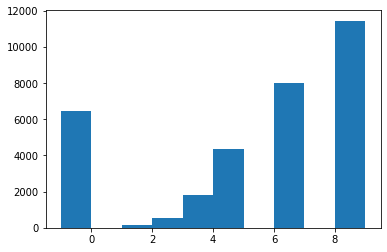

In [5]:
from matplotlib import pyplot as plt
plt.hist(RHS)
plt.show()